# Visualizations
Loading data, generating the technical indicators, plotting the indicators.

In [1]:
## Packages

import os
import csv
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.preprocessing import RobustScaler, MinMaxScaler

from ta import add_all_ta_features
from ta.momentum import rsi
from ta.trend import macd, cci, ema_indicator, sma_indicator
from ta.volatility import bollinger_hband, bollinger_lband, average_true_range

In [2]:
## Pre-processing

os.chdir('C:/Users/abolf/Jupyter/Forex')
dff = pd.read_csv('DATAF.csv', parse_dates=['Date'])
dft = pd.read_csv('DATAT.csv')
dft = dft.drop(['Open','Date'], axis= 1)

dft['ema'] = ema_indicator(dft['Close'], window=26)                             # trend
dft['macd'] = 10*macd(dft['Close'], window_slow=26, window_fast=12)             # trend
dft['rsi'] = sma_indicator(rsi(dft['Close'], window=12)/100, 6)                 # momentum, smoothed
dft['bbh'] = bollinger_hband(dft['Close'], window=26, window_dev=2)             # volatility
dft['bbl'] = bollinger_lband(dft['Close'], window=26, window_dev=2)             # volatility
dft['atr'] = 50*average_true_range(dft['High'],dft['Low'],dft['Close'], window=12) # volatility
dft['atr'] = sma_indicator(dft['atr'], 6)                                       # smoothing 

df = pd.concat([dff, dft], axis=1)
df

,Date,EURINF,USAINF,EURLTINT,USALTINT,EURUNEMP,USAUNEMP,Close,High,Low,ema,macd,rsi,bbh,bbl,atr
0,2000-01-03,1.9,2.7,5.70,6.660,9.4396,4.0,1.0265,1.0282,1.0050,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,1.9,2.7,5.70,6.660,9.4396,4.0,1.0312,1.0347,1.0213,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,1.9,2.7,5.70,6.660,9.4396,4.0,1.0316,1.0404,1.0282,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,1.9,2.7,5.70,6.660,9.4396,4.0,1.0324,1.0419,1.0275,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,1.9,2.7,5.70,6.660,9.4396,4.0,1.0292,1.0333,1.0252,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,2025-03-10,2.2,2.4,3.24,4.216,6.2000,4.2,1.0832,1.0875,1.0805,1.054008,0.097686,0.692751,1.079363,1.018491,0.457571
6571,2025-03-11,2.2,2.4,3.24,4.285,6.2000,4.2,1.0918,1.0947,1.0829,1.056807,0.112805,0.729561,1.085152,1.017118,0.470690
6572,2025-03-12,2.2,2.4,3.24,4.315,6.2000,4.2,1.0886,1.0932,1.0875,1.059162,0.120812,0.743572,1.089561,1.016623,0.475771
6573,2025-03-13,2.2,2.4,3.24,4.273,6.2000,4.2,1.0852,1.0898,1.0822,1.061091,0.122997,0.737870,1.092916,1.016730,0.472166


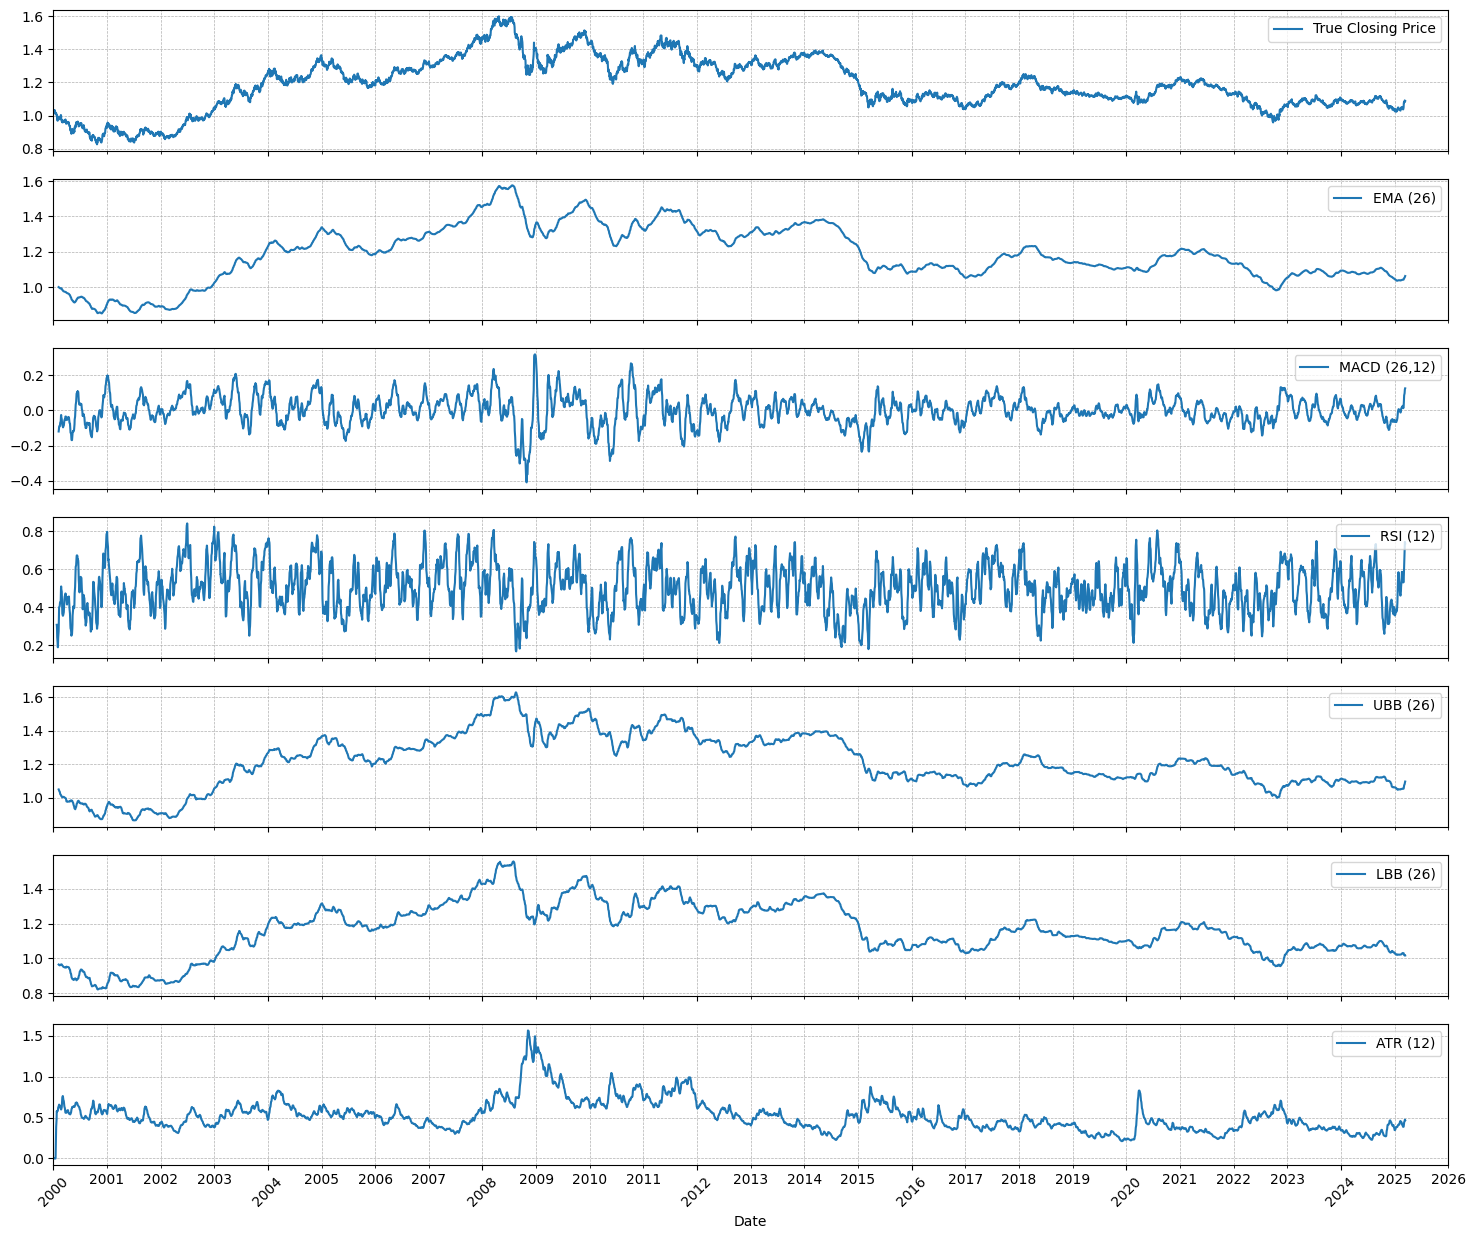

In [3]:
## Time plot of Technical Indicators

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(18, 15), sharex=True)

ax1.plot(df['Date'], df['Close'], label='True Closing Price')
ax1.legend(['True Closing Price'], loc='upper right')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2.plot(df['Date'], df['ema'], label='EMA (26)')
ax2.legend(['EMA (26)'], loc='upper right')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

ax3.plot(df['Date'], df['macd'], label='MACD (26,12)')
ax3.legend(['MACD (26,12)'], loc='upper right')
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

ax4.plot(df['Date'], df['rsi'], label='RSI (12)')
ax4.legend(['RSI (12)'], loc='upper right')
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)

ax5.plot(df['Date'], df['bbh'], label='UBB (26)')
ax5.legend(['UBB (26)'], loc='upper right')
ax5.grid(True, which='both', linestyle='--', linewidth=0.5)

ax6.plot(df['Date'], df['bbl'], label='LBB (26)')
ax6.legend(['LBB (26)'], loc='upper right')
ax6.grid(True, which='both', linestyle='--', linewidth=0.5)

ax7.plot(df['Date'], df['atr'], label='ATR (12)')
ax7.legend(['ATR (12)'], loc='upper right')
ax7.grid(True, which='both', linestyle='--', linewidth=0.5)

ax7.xaxis.set_minor_locator(mdates.YearLocator())
ax7.xaxis.set_minor_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.xlim(pd.to_datetime('2000'), pd.to_datetime('2026'))
plt.xticks(rotation=45)

plt.show()

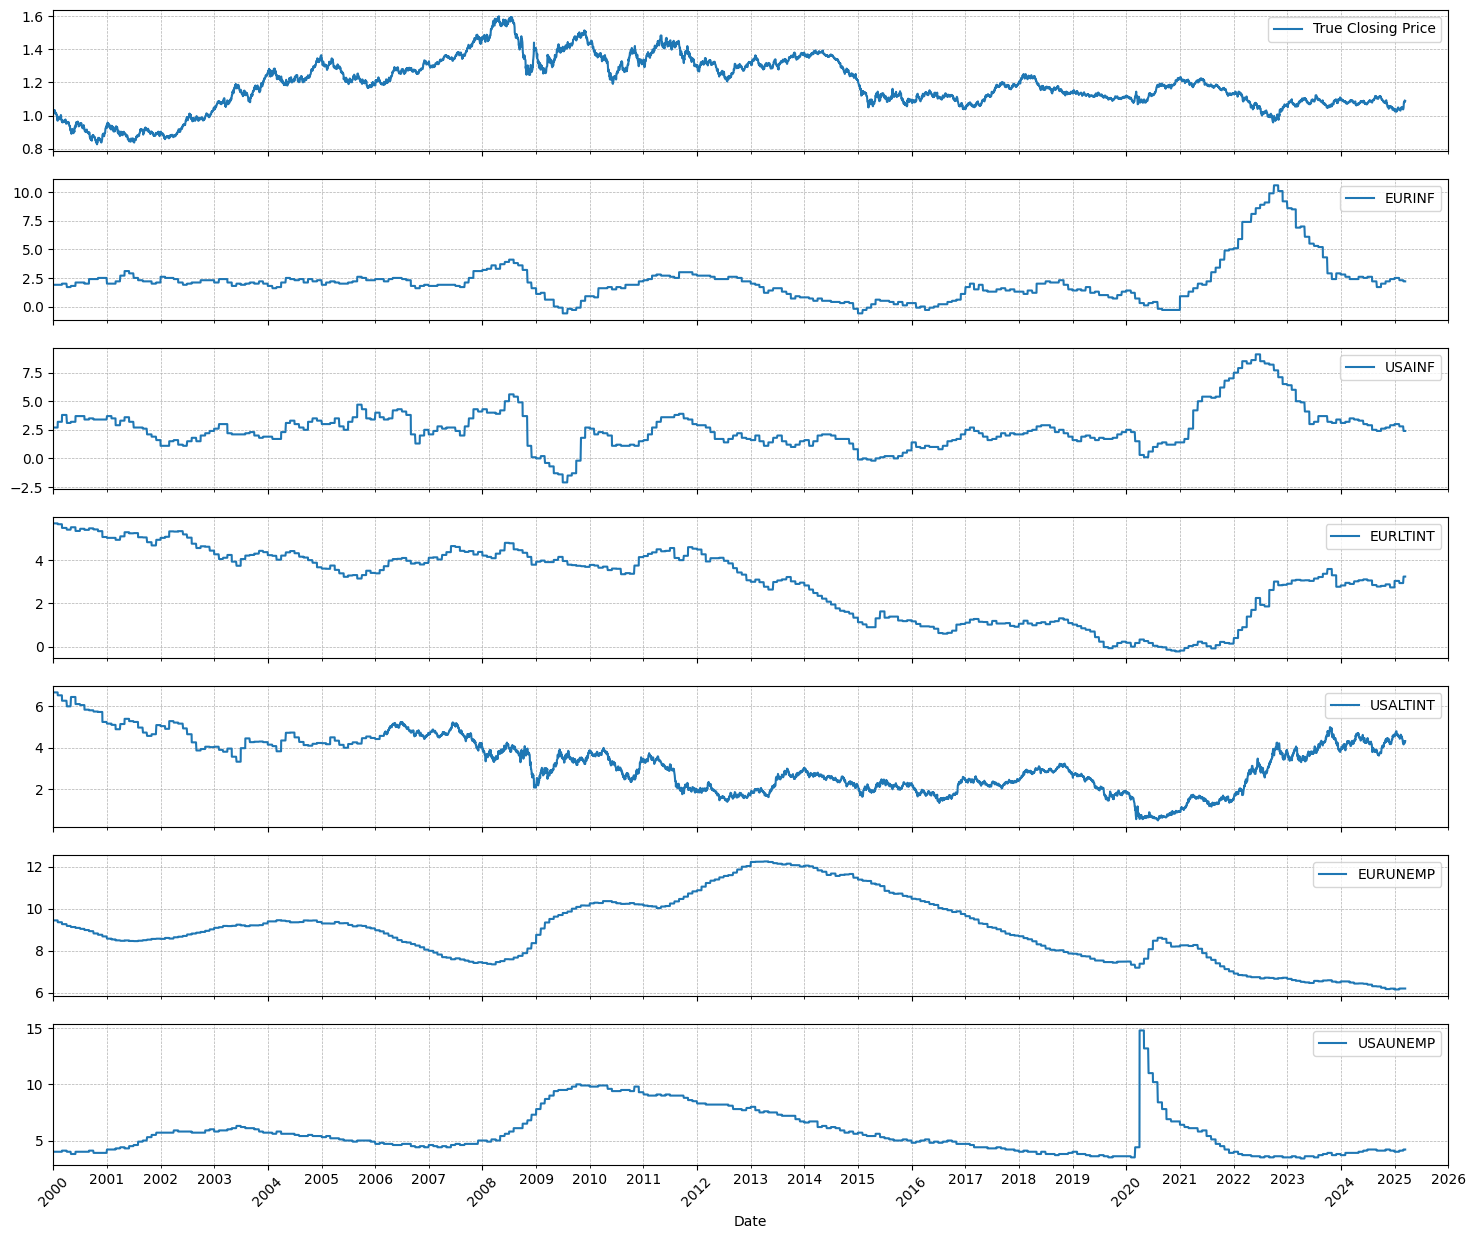

In [4]:
## Time plot of Fundamental Indicators

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(18, 15), sharex=True)

ax1.plot(df['Date'], df['Close'], label='True Closing Price')
ax1.legend(['True Closing Price'], loc='upper right')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2.plot(df['Date'], df['EURINF'], label='EURINF')
ax2.legend(['EURINF'], loc='upper right')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

ax3.plot(df['Date'], df['USAINF'], label='USAINF')
ax3.legend(['USAINF'], loc='upper right')
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

ax4.plot(df['Date'], df['EURLTINT'], label='EURLTINT')
ax4.legend(['EURLTINT'], loc='upper right')
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)

ax5.plot(df['Date'], df['USALTINT'], label='USALTINT')
ax5.legend(['USALTINT'], loc='upper right')
ax5.grid(True, which='both', linestyle='--', linewidth=0.5)

ax6.plot(df['Date'], df['EURUNEMP'], label='EURUNEMP')
ax6.legend(['EURUNEMP'], loc='upper right')
ax6.grid(True, which='both', linestyle='--', linewidth=0.5)

ax7.plot(df['Date'], df['USAUNEMP'], label='USAUNEMP')
ax7.legend(['USAUNEMP'], loc='upper right')
ax7.grid(True, which='both', linestyle='--', linewidth=0.5)

ax7.xaxis.set_minor_locator(mdates.YearLocator())
ax7.xaxis.set_minor_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.xlim(pd.to_datetime('2000'), pd.to_datetime('2026'))
plt.xticks(rotation=45)

plt.show()

In [5]:
## Applying Scalers

y = df['Close']
Date = df['Date'].reset_index()
df = df.drop(['Date','Close','High','Low'], axis= 1)
print('Shape of df & y before scaling:', df.shape, y.shape)

split_time = round(0.85*len(df.index))    # 5904
split_train = round(0.70*len(df.index))   # train: 0:4304

# RobustScaler
rs = RobustScaler().fit(df.head(split_time))
df_rs = rs.transform(df)
y = y.to_numpy().reshape(-1, 1)
rsy = RobustScaler().fit(y[0:split_time])
y_rs = rsy.transform(y)

# MinMaxScaler
mm = MinMaxScaler().fit(df_rs)
df_std = mm.transform(df_rs)
df_std = pd.DataFrame(df_std, columns=df.columns)
mmy = MinMaxScaler().fit(y_rs)
y_std = mmy.transform(y_rs)
y_std = pd.DataFrame(y_std)

df = pd.concat([df_std, Date['Date']], axis=1)
df = pd.concat([df, y_std], axis=1)
df.rename(columns={0: 'Close'}, inplace=True)
df

Shape of df & y before scaling: (6575, 12) (6575,)


,EURINF,USAINF,EURLTINT,USALTINT,EURUNEMP,USAUNEMP,ema,macd,rsi,bbh,bbl,atr,Date,Close
0,0.223214,0.428571,1.000000,1.000000,0.539362,0.052632,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,0.258198
1,0.223214,0.428571,1.000000,1.000000,0.539362,0.052632,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,0.264290
2,0.223214,0.428571,1.000000,1.000000,0.539362,0.052632,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-05,0.264809
3,0.223214,0.428571,1.000000,1.000000,0.539362,0.052632,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-06,0.265846
4,0.223214,0.428571,1.000000,1.000000,0.539362,0.052632,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-07,0.261698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,0.250000,0.401786,0.584459,0.602731,0.007373,0.070175,0.279045,0.696305,0.779733,0.281661,0.267040,0.292088,2025-03-10,0.331692
6571,0.250000,0.401786,0.584459,0.613947,0.007373,0.070175,0.282910,0.717069,0.834387,0.289251,0.265172,0.300463,2025-03-11,0.342839
6572,0.250000,0.401786,0.584459,0.618823,0.007373,0.070175,0.286161,0.728066,0.855192,0.295033,0.264499,0.303706,2025-03-12,0.338691
6573,0.250000,0.401786,0.584459,0.611996,0.007373,0.070175,0.288824,0.731066,0.846725,0.299431,0.264645,0.301405,2025-03-13,0.334284


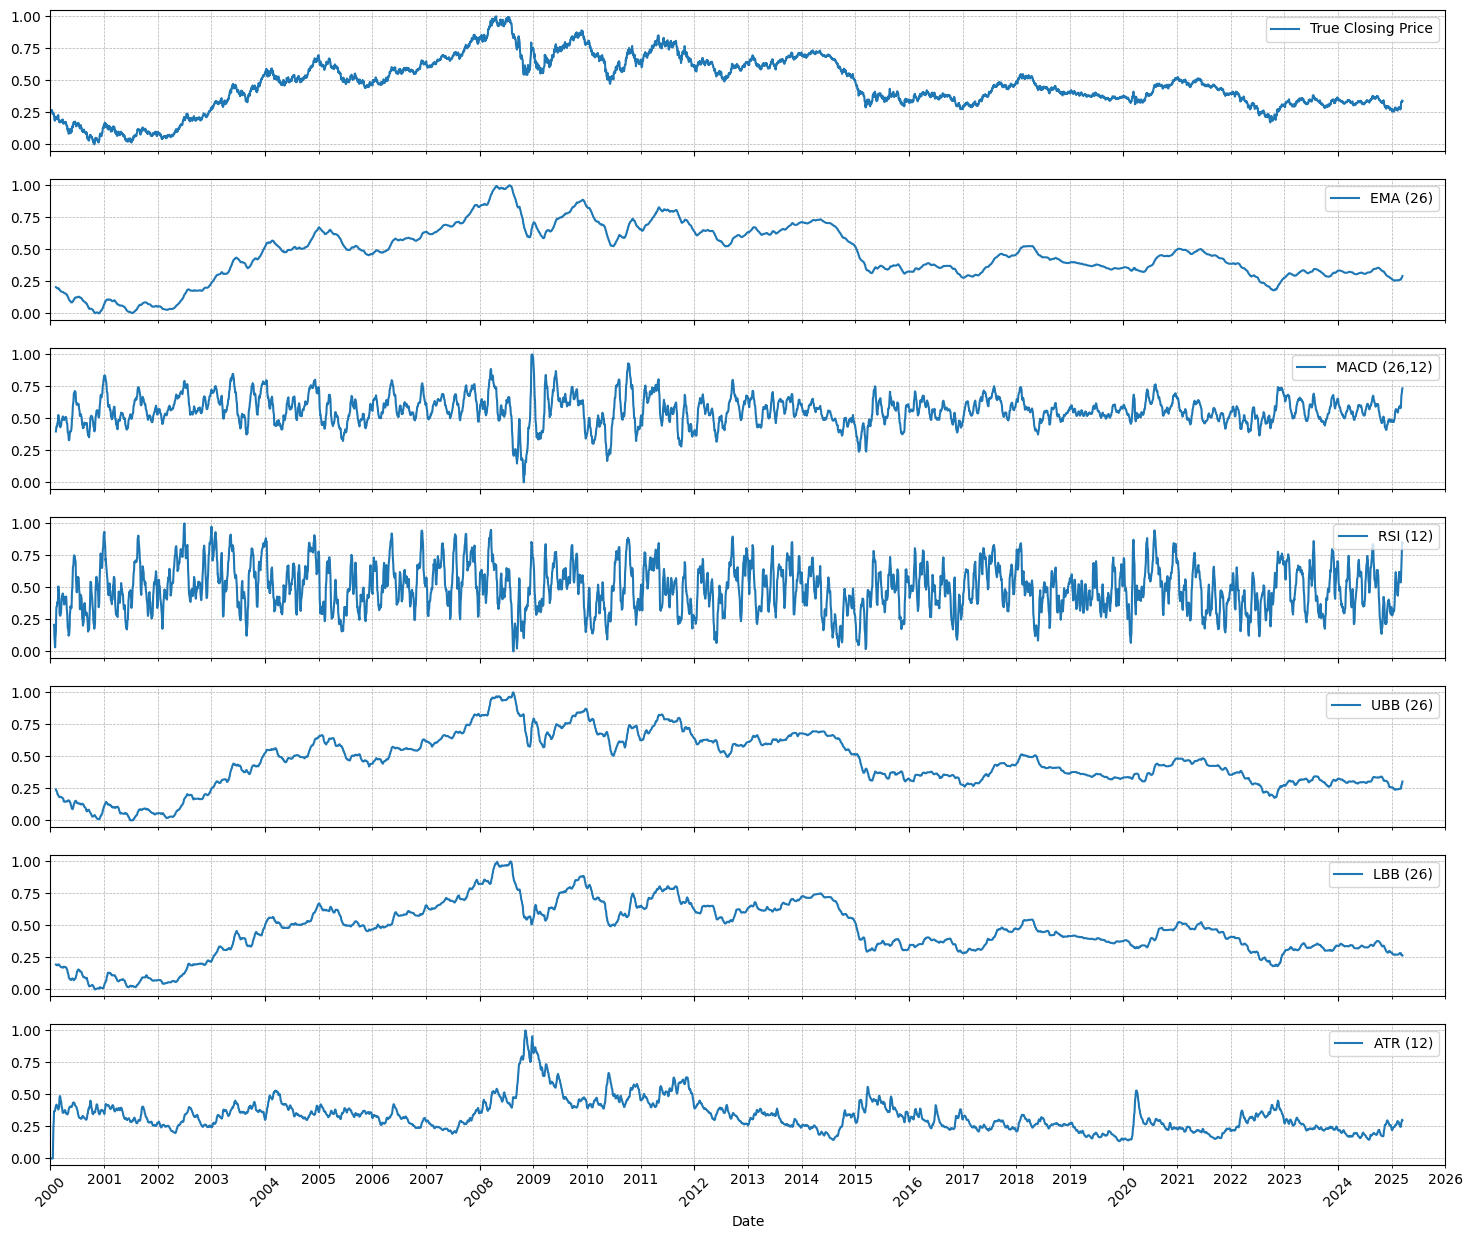

In [6]:
## Time plot of Scaled Technical Indicators

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(18, 15), sharex=True)

ax1.plot(df['Date'], df['Close'], label='True Closing Price')
ax1.legend(['True Closing Price'], loc='upper right')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2.plot(df['Date'], df['ema'], label='EMA (26)')
ax2.legend(['EMA (26)'], loc='upper right')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

ax3.plot(df['Date'], df['macd'], label='MACD (26,12)')
ax3.legend(['MACD (26,12)'], loc='upper right')
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

ax4.plot(df['Date'], df['rsi'], label='RSI (12)')
ax4.legend(['RSI (12)'], loc='upper right')
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)

ax5.plot(df['Date'], df['bbh'], label='UBB (26)')
ax5.legend(['UBB (26)'], loc='upper right')
ax5.grid(True, which='both', linestyle='--', linewidth=0.5)

ax6.plot(df['Date'], df['bbl'], label='LBB (26)')
ax6.legend(['LBB (26)'], loc='upper right')
ax6.grid(True, which='both', linestyle='--', linewidth=0.5)

ax7.plot(df['Date'], df['atr'], label='ATR (12)')
ax7.legend(['ATR (12)'], loc='upper right')
ax7.grid(True, which='both', linestyle='--', linewidth=0.5)

ax7.xaxis.set_minor_locator(mdates.YearLocator())
ax7.xaxis.set_minor_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.xlim(pd.to_datetime('2000'), pd.to_datetime('2026'))
plt.xticks(rotation=45)

plt.show()

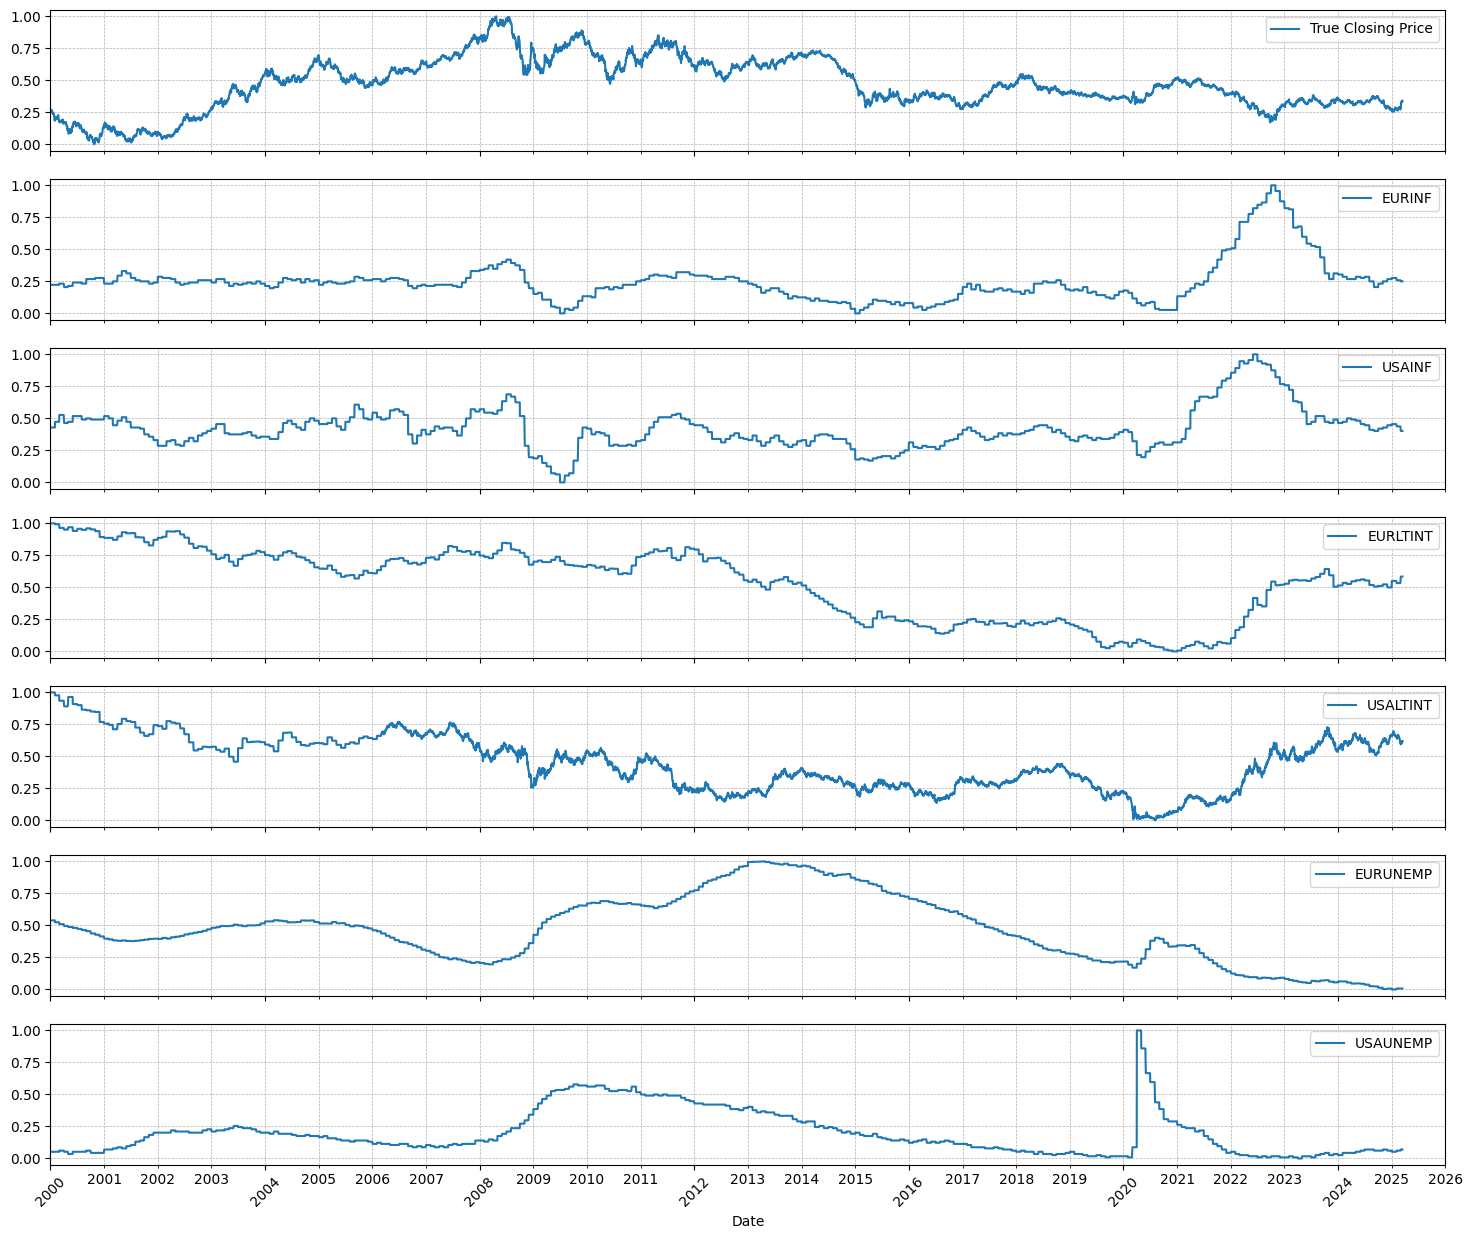

In [7]:
## Time plot of Scaled Fundamental Indicators

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(18, 15), sharex=True)

ax1.plot(df['Date'], df['Close'], label='True Closing Price')
ax1.legend(['True Closing Price'], loc='upper right')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2.plot(df['Date'], df['EURINF'], label='EURINF')
ax2.legend(['EURINF'], loc='upper right')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

ax3.plot(df['Date'], df['USAINF'], label='USAINF')
ax3.legend(['USAINF'], loc='upper right')
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

ax4.plot(df['Date'], df['EURLTINT'], label='EURLTINT')
ax4.legend(['EURLTINT'], loc='upper right')
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)

ax5.plot(df['Date'], df['USALTINT'], label='USALTINT')
ax5.legend(['USALTINT'], loc='upper right')
ax5.grid(True, which='both', linestyle='--', linewidth=0.5)

ax6.plot(df['Date'], df['EURUNEMP'], label='EURUNEMP')
ax6.legend(['EURUNEMP'], loc='upper right')
ax6.grid(True, which='both', linestyle='--', linewidth=0.5)

ax7.plot(df['Date'], df['USAUNEMP'], label='USAUNEMP')
ax7.legend(['USAUNEMP'], loc='upper right')
ax7.grid(True, which='both', linestyle='--', linewidth=0.5)

ax7.xaxis.set_minor_locator(mdates.YearLocator())
ax7.xaxis.set_minor_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.xlim(pd.to_datetime('2000'), pd.to_datetime('2026'))
plt.xticks(rotation=45)

plt.show()